<a href="https://colab.research.google.com/github/cjvilla/Gold-Projections/blob/main/Code/RandomForestRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Imported Modules**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.ensemble import RandomForestRegressor
!pip install psycopg2-binary
import psycopg2

     |████████████████████████████████| 3.0MB 4.2MB/s 


In [2]:
engine = psycopg2.connect("dbname=gold_project user=gold host=gold-project.c58dxtfoq0r7.us-east-2.rds.amazonaws.com password=b00tcamp1! port=5432")

In [3]:
data = pd.read_sql_query('select * from final_gold_prediction_data', con=engine)
data.head()

,Year,Month,Inflation_Value,dollar_index,us_dollar,pound,indian_rupee,south_african_rand,australian_dollar
0,1979,1,9.3,86.239,227.290909,113.327273,1852.859091,197.018182,198.600000
1,1979,2,9.9,87.082,245.690000,122.555000,2010.370000,209.860000,216.650000
2,1979,3,10.1,87.280,242.063636,118.795455,1974.931818,204.359091,215.945455
3,1979,4,10.5,88.228,238.685714,115.138095,1956.809524,202.347619,215.414286
4,1979,5,10.9,89.270,257.800000,125.230435,2119.934783,217.695652,233.165217


In [4]:
data['Date'] = data.Month.astype(str) + '/' +  data.Year.astype(str)
data['Date'] = pd.to_datetime(data['Date'])
data['Date'] = data['Date'].dt.date.apply(lambda x: x.strftime('%m/%Y'))
data.head()

,Year,Month,Inflation_Value,dollar_index,us_dollar,pound,indian_rupee,south_african_rand,australian_dollar,Date
0,1979,1,9.3,86.239,227.290909,113.327273,1852.859091,197.018182,198.600000,01/1979
1,1979,2,9.9,87.082,245.690000,122.555000,2010.370000,209.860000,216.650000,02/1979
2,1979,3,10.1,87.280,242.063636,118.795455,1974.931818,204.359091,215.945455,03/1979
3,1979,4,10.5,88.228,238.685714,115.138095,1956.809524,202.347619,215.414286,04/1979
4,1979,5,10.9,89.270,257.800000,125.230435,2119.934783,217.695652,233.165217,05/1979


In [5]:
data = data[['Date', 'Inflation_Value', 'dollar_index', 'us_dollar', 'pound', 'indian_rupee', 'south_african_rand', 'australian_dollar']]
data.head()

,Date,Inflation_Value,dollar_index,us_dollar,pound,indian_rupee,south_african_rand,australian_dollar
0,01/1979,9.3,86.239,227.290909,113.327273,1852.859091,197.018182,198.600000
1,02/1979,9.9,87.082,245.690000,122.555000,2010.370000,209.860000,216.650000
2,03/1979,10.1,87.280,242.063636,118.795455,1974.931818,204.359091,215.945455
3,04/1979,10.5,88.228,238.685714,115.138095,1956.809524,202.347619,215.414286
4,05/1979,10.9,89.270,257.800000,125.230435,2119.934783,217.695652,233.165217


In [6]:
data['Date'] = pd.to_datetime(data['Date'])
data['Date'] = data['Date'].dt.date.apply(lambda x: x.strftime('%m/%Y'))
data.head()

,Date,Inflation_Value,dollar_index,us_dollar,pound,indian_rupee,south_african_rand,australian_dollar
0,01/1979,9.3,86.239,227.290909,113.327273,1852.859091,197.018182,198.600000
1,02/1979,9.9,87.082,245.690000,122.555000,2010.370000,209.860000,216.650000
2,03/1979,10.1,87.280,242.063636,118.795455,1974.931818,204.359091,215.945455
3,04/1979,10.5,88.228,238.685714,115.138095,1956.809524,202.347619,215.414286
4,05/1979,10.9,89.270,257.800000,125.230435,2119.934783,217.695652,233.165217


# **Feature Correlation Heatmap**

Text(0.5, 1.12, 'Feature Correlation')

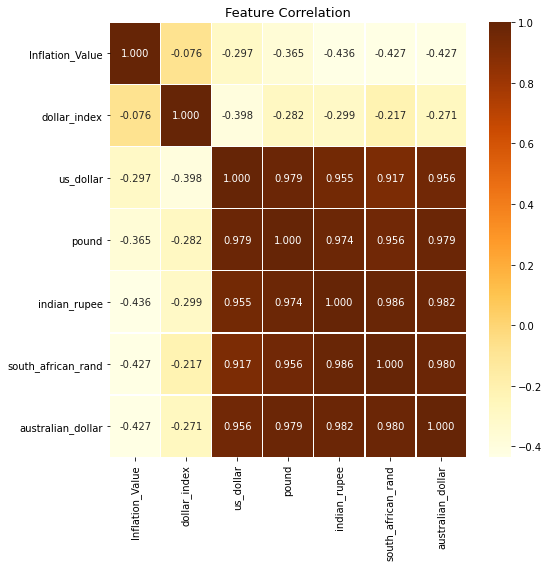

In [ ]:
corr = data.corr()
figure = plt.figure(figsize = (8,8))
heatmap = sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True,fmt='.3f',linewidths=0.2, cmap='YlOrBr')
plt.title('Feature Correlation', y = 1.12, size=13, loc="center")

# **USA Model**

In [ ]:
from sklearn.model_selection import train_test_split
temp = data[['Inflation_Value', 'dollar_index']]
y_temp = data[['us_dollar']]
x = temp.iloc[:,:].values
y= data.loc[:,['us_dollar']].values

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
y_pred = regressor.predict(x_test)
y_pred

array([1139.34012102,  681.50352995,  441.063053  ,  585.52508019,
        547.13147727, 1146.67809494,  596.03971278,  872.49943184,
        632.41553834, 1046.55136282, 1462.70455862,  975.02520381,
        363.59516774,  463.36614693,  397.51484939, 1313.29157728,
        307.37187621,  424.61172433,  376.48351717,  476.25645964,
        560.96570877,  522.59731772,  411.50606297, 1154.09768321,
       1379.88124938,  403.90641717,  420.52199231, 1151.14039156,
        309.09217002,  677.20319047, 1339.63419891,  398.10320262,
       1190.49299658,  358.82025985,  395.42359317,  948.14506884,
        677.07911746,  601.08411422,  376.48351717,  435.40683613,
        397.06459426,  378.40941558, 1113.18447741, 1037.36357639,
        462.59069761, 1436.11672593, 1082.65744821,  449.22605388,
        909.12632737,  376.59949146,  585.84476082, 1632.32901843,
        822.46732798,  456.95361848,  365.29962819, 1087.00382955,
       1149.58688331,  477.31700491, 1276.31649729,  419.67033

In [ ]:
accuracy_train = regressor.score(x_train, y_train)
accuracy_test = regressor.score(x_test, y_test)
print("Training Accuracy: ", accuracy_train * 100)
print("Testing Accuracy: ", accuracy_test * 100)

Training Accuracy:  93.49776197989598
Testing Accuracy:  56.904352558326885


In [ ]:
from sklearn import metrics
print('MAE :'," ", metrics.mean_absolute_error(y_test,y_pred))
print('MSE :'," ", metrics.mean_squared_error(y_test,y_pred))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE :   182.25470202318704
MSE :   87314.97829610611
RMAE :   295.4910798926189


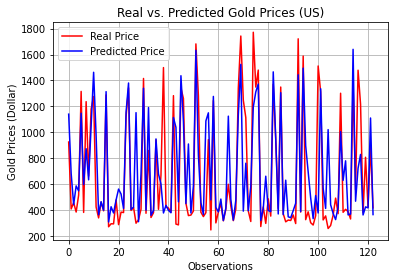

In [ ]:
plt.plot(y_test, color = 'Red', label = 'Real Price')
plt.plot(y_pred, color = 'Blue', label = 'Predicted Price')
plt.grid(2.5)
plt.title('Real vs. Predicted Gold Prices (US)')
plt.xlabel('Observations')
plt.ylabel('Gold Prices (Dollar)')
plt.legend()
plt.show()

In [ ]:
money = regressor.feature_importances_
money

array([0.32341969, 0.67658031])

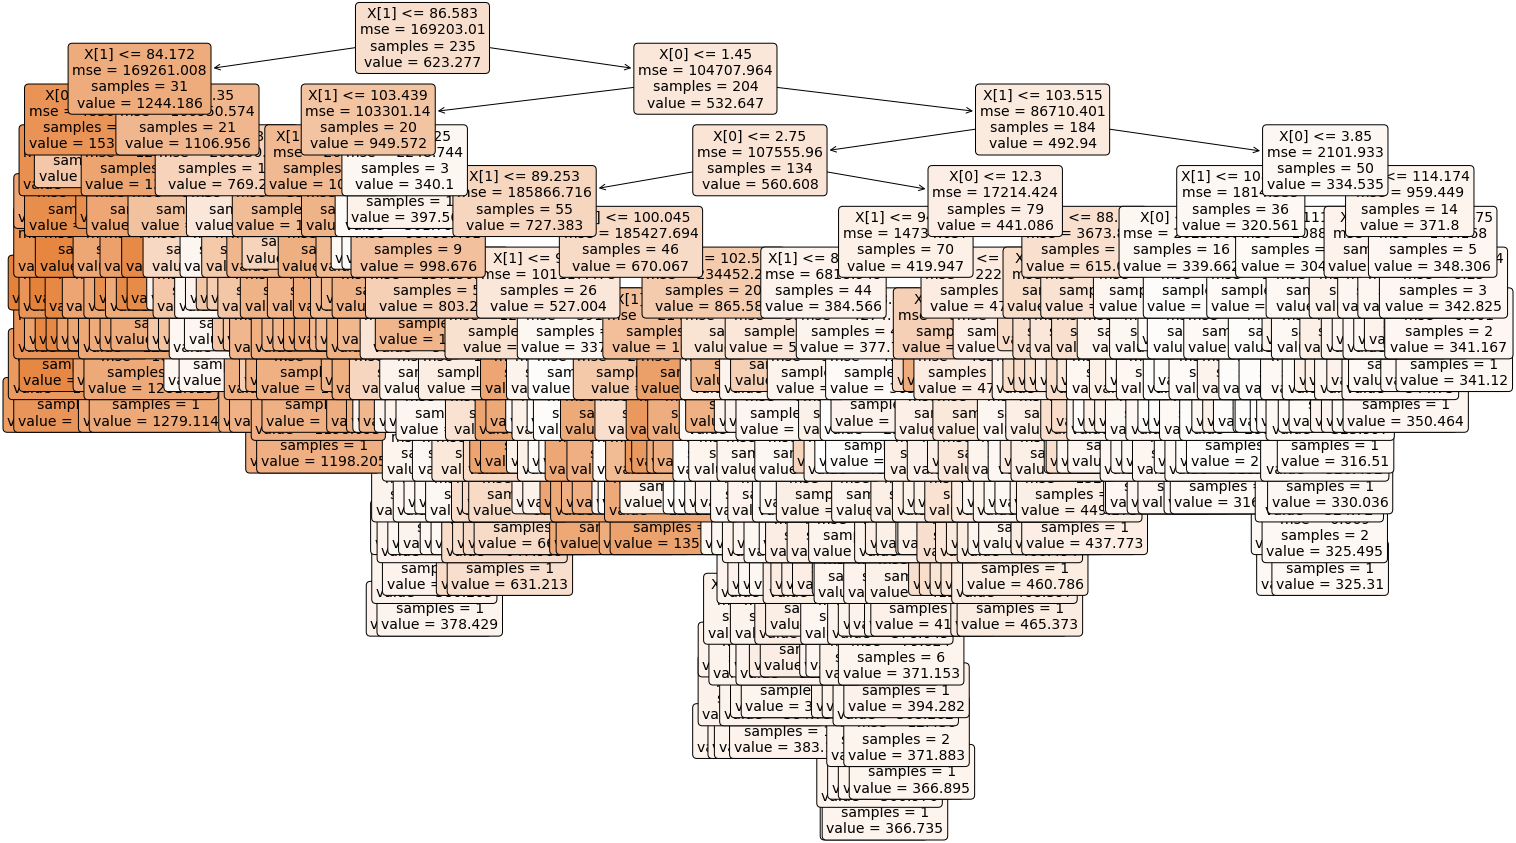

In [ ]:
import pydot
# Pull out one tree from the forest
Tree = regressor.estimators_[5]
# Export the image to a dot file
from sklearn import tree
plt.figure(figsize=(25,15))
tree.plot_tree(Tree,filled=True, 
              rounded=True, 
              fontsize=14);

# **UK Model**

In [ ]:
from sklearn.model_selection import train_test_split
temp = data[['Inflation_Value', 'dollar_index']]
y_temp = data[['pound']]
x = temp.iloc[:,:].values
y= data.loc[:,['pound']].values

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
y_pred = regressor.predict(x_test)
y_pred

array([ 755.29659812,  539.20890795,  262.27931694,  206.25802859,
        246.02846388,  799.02072074,  200.48203091,  632.81743983,
        270.38666572,  646.32078161,  934.22451904,  715.64588632,
        214.8454614 ,  278.83759599,  242.80770527,  797.46254438,
        201.94739313,  237.79677195,  249.29546676,  266.79134001,
        244.44591558,  302.06961701,  261.98313263,  758.79252778,
        837.45102191,  258.45054284,  235.08553673,  852.95740211,
        255.25949603,  480.22677445,  902.41580802,  200.11855599,
        784.85880599,  218.80026396,  245.78992432,  486.47597167,
        559.15694183,  260.44140088,  249.29546676,  248.55802293,
        263.31583296,  228.8361284 ,  798.86144344,  759.3196943 ,
        280.21283559,  933.52119842,  827.99718147,  247.27286325,
        658.61631173,  230.5051313 ,  243.5208037 , 1019.1012083 ,
        630.1993463 ,  245.53639766,  247.79312761,  825.11083552,
        767.01632498,  184.69763581,  906.6345164 ,  217.69643

In [ ]:
accuracy_train = regressor.score(x_train, y_train)
accuracy_test = regressor.score(x_test, y_test)
print("Training Accuracy: ", accuracy_train * 100)
print("Testing Accuracy: ", accuracy_test * 100)

Training Accuracy:  92.31218372396151
Testing Accuracy:  45.93898526372461


In [ ]:
from sklearn import metrics
print('MAE :'," ", metrics.mean_absolute_error(y_test,y_pred))
print('MSE :'," ", metrics.mean_squared_error(y_test,y_pred))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE :   132.77070692994306
MSE :   56174.125335866345
RMAE :   237.01081269821077


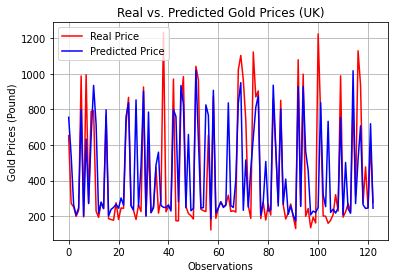

In [ ]:
plt.plot(y_test, color = 'Red', label = 'Real Price')
plt.plot(y_pred, color = 'Blue', label = 'Predicted Price')
plt.grid(2.5)
plt.title('Real vs. Predicted Gold Prices (UK)')
plt.xlabel('Observations')
plt.ylabel('Gold Prices (Pound)')
plt.legend()
plt.show()

In [ ]:
regressor.feature_importances_

array([0.36213114, 0.63786886])

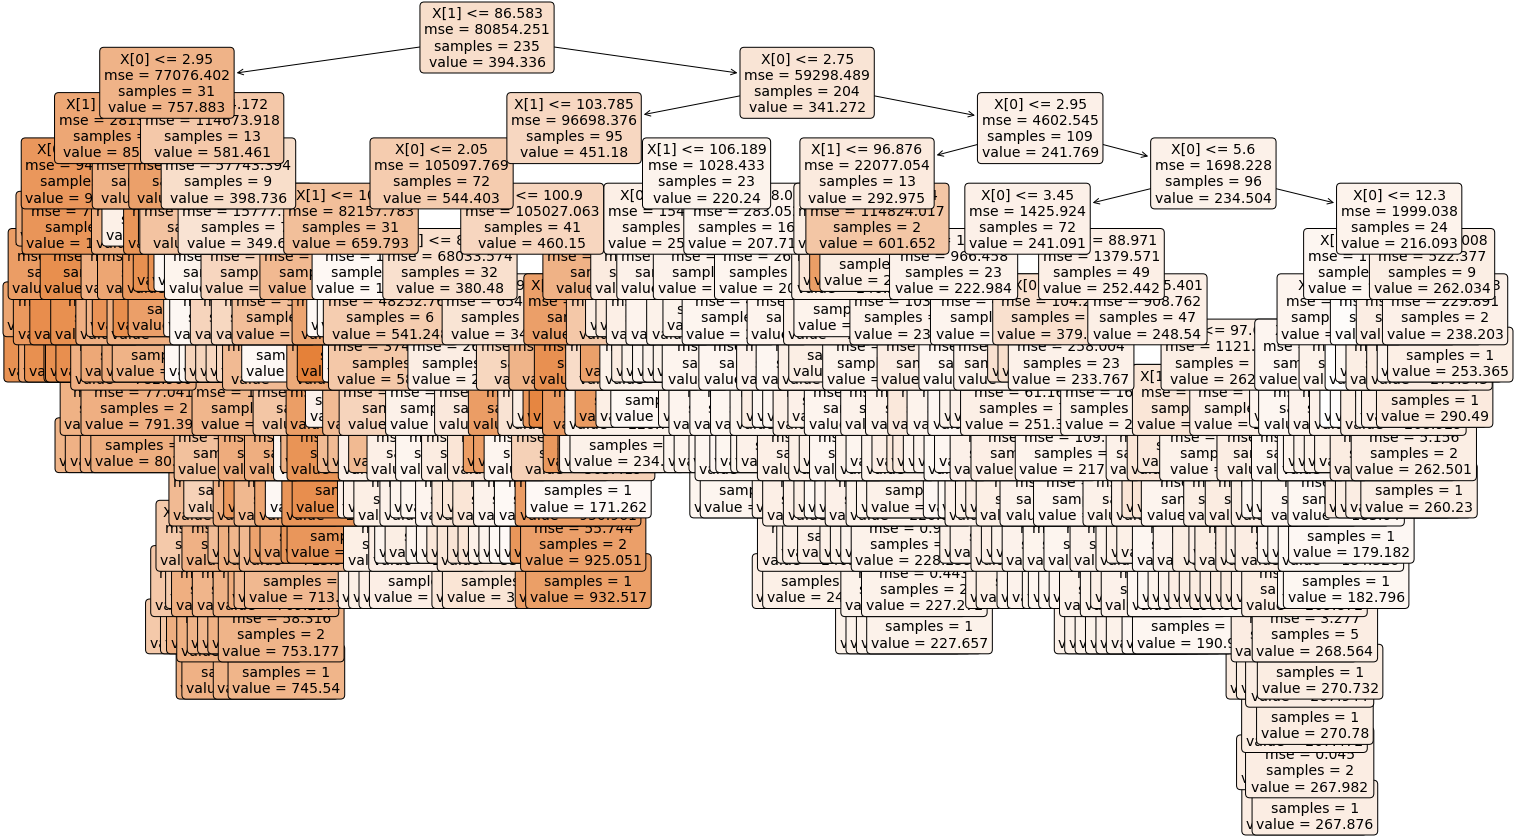

In [ ]:
import pydot
# Pull out one tree from the forest
Tree = regressor.estimators_[5]
# Export the image to a dot file
from sklearn import tree
plt.figure(figsize=(25,15))
tree.plot_tree(Tree,filled=True, 
              rounded=True, 
              fontsize=14);

# **India Model**

In [ ]:
from sklearn.model_selection import train_test_split
temp = data[['Inflation_Value', 'dollar_index']]
y_temp = data[['indian_rupee']]
x = temp.iloc[:,:].values
y= data.loc[:,['indian_rupee']].values

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
y_pred = regressor.predict(x_test)
y_pred

array([72469.4181658 , 41703.94575   ,  9090.24889385, 10503.80471409,
        4476.43380064, 71497.900627  ,  5871.35379043, 60058.5722357 ,
        4979.56030637, 55951.7501812 , 73296.9125902 , 59250.796134  ,
       11632.88380625, 19678.74988273,  6494.53872007, 77516.5811311 ,
       11990.18670343, 20997.0368453 , 18422.19543705, 14320.38929316,
       11715.02073449, 20420.2489115 , 14173.85281385, 74225.3291566 ,
       81615.5928304 , 13528.6365827 ,  8263.98348301, 82393.4779909 ,
        3870.4185472 , 40809.3415237 , 83744.6644521 ,  3230.50144523,
       75187.0253595 , 11203.56659134, 12616.5339881 , 40232.9046493 ,
       36287.3748302 ,  4734.04581972, 18422.19543705, 21280.5967422 ,
        5053.08216314, 12474.14835278, 69490.3510267 , 65262.2853202 ,
       24184.2302688 , 80054.0940616 , 69881.3687045 ,  6708.62993139,
       60429.7935428 , 11576.23321728,  4507.18932637, 86476.7368979 ,
       55023.1572788 , 12997.7229943 ,  5848.92942742, 74852.9746669 ,
      

In [ ]:
accuracy_train = regressor.score(x_train, y_train)
accuracy_test = regressor.score(x_test, y_test)
print("Training Accuracy: ", accuracy_train * 100)
print("Testing Accuracy: ", accuracy_test * 100)

Training Accuracy:  93.87587223850264
Testing Accuracy:  51.36673124018056


In [ ]:
from sklearn import metrics
print('MAE :'," ", metrics.mean_absolute_error(y_test,y_pred))
print('MSE :'," ", metrics.mean_squared_error(y_test,y_pred))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE :   12973.180422909678
MSE :   508290842.11459035
RMAE :   22545.306432040135


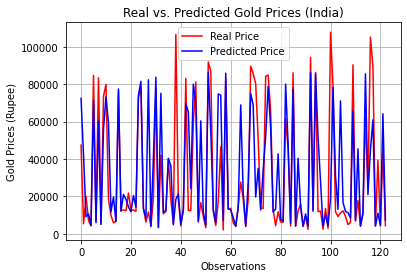

In [ ]:
plt.plot(y_test, color = 'Red', label = 'Real Price')
plt.plot(y_pred, color = 'Blue', label = 'Predicted Price')
plt.grid(2.5)
plt.title('Real vs. Predicted Gold Prices (India)')
plt.xlabel('Observations')
plt.ylabel('Gold Prices (Rupee)')
plt.legend()
plt.show()

In [ ]:
regressor.feature_importances_

array([0.43470709, 0.56529291])

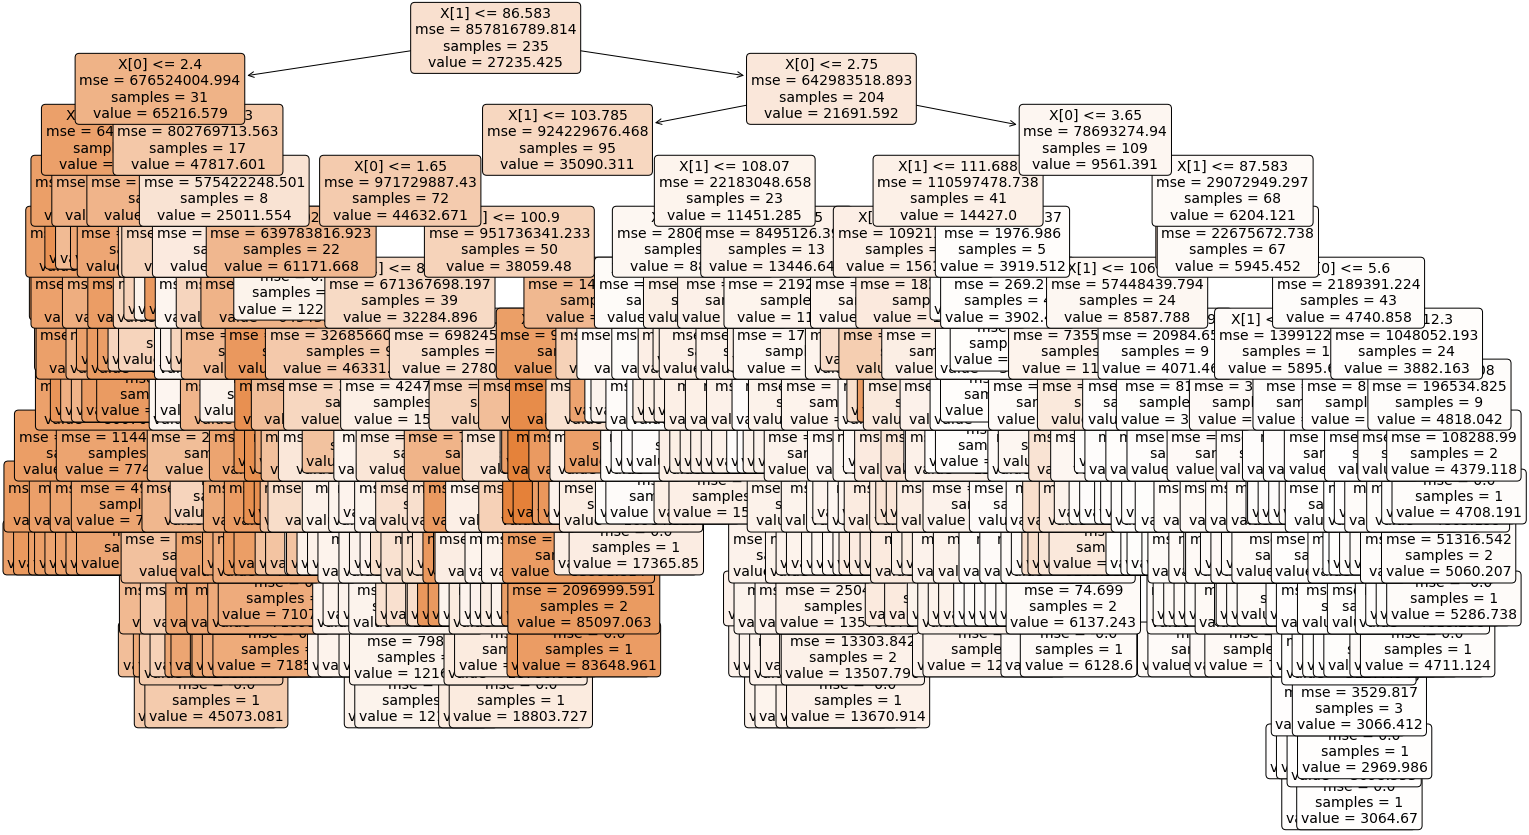

In [ ]:
import pydot
# Pull out one tree from the forest
Tree = regressor.estimators_[5]
# Export the image to a dot file
from sklearn import tree
plt.figure(figsize=(25,15))
tree.plot_tree(Tree,filled=True, 
              rounded=True, 
              fontsize=14);

# **South African Model**

In [ ]:
from sklearn.model_selection import train_test_split
temp = data[['Inflation_Value', 'dollar_index']]
y_temp = data[['south_african_rand']]
x = temp.iloc[:,:].values
y= data.loc[:,['south_african_rand']].values

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
y_pred = regressor.predict(x_test)
y_pred

array([15308.65533404,  8781.71296558,  1701.58936866,  2045.31822987,
         441.86677592, 12107.40676664,   895.3873359 , 11856.46727209,
         536.10881285, 11396.12338716, 11480.7290827 , 11252.98114684,
        1402.36202717,  2862.16125162,  1035.79641574, 13466.34864866,
        2079.59919919,  3250.39553028,  3046.59195265,  2221.73021944,
        1511.37358088,  2200.53238948,  1435.01540772, 15596.80508996,
       13169.01853736,  1476.56036168,  1069.27801747, 16286.3518407 ,
         637.87818996,  8390.94342048, 13537.52288768,   359.40775276,
       14235.8876629 ,  1154.84197605,  1457.35878728,  7320.83020902,
        8882.33695362,   478.25740156,  2855.16460855,  2708.6417223 ,
         720.77879888,  1573.72073354, 14043.25406532, 13669.49563811,
        3920.2549394 , 12730.18214324, 15166.52351364,   997.34974464,
       11526.92167911,  1313.35952838,   438.83610886, 13734.87916019,
       10544.30665161,  1639.41636455,   978.17563322, 14799.24907423,
      

In [ ]:
accuracy_train = regressor.score(x_train, y_train)
accuracy_test = regressor.score(x_test, y_test)
print("Training Accuracy: ", accuracy_train * 100)
print("Testing Accuracy: ", accuracy_test * 100)

Training Accuracy:  93.16945174269881
Testing Accuracy:  41.937604213720526


In [ ]:
from sklearn import metrics
print('MAE :'," ", metrics.mean_absolute_error(y_test,y_pred))
print('MSE :'," ", metrics.mean_squared_error(y_test,y_pred))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE :   2635.8981024766017
MSE :   23019077.278907977
RMAE :   4797.8200548695


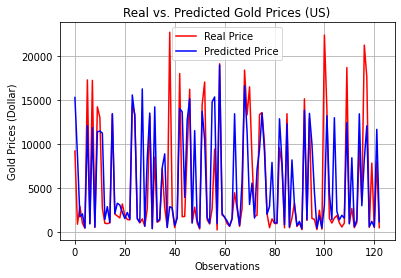

In [ ]:
plt.plot(y_test, color = 'Red', label = 'Real Price')
plt.plot(y_pred, color = 'Blue', label = 'Predicted Price')
plt.grid(2.5)
plt.title('Real vs. Predicted Gold Prices (US)')
plt.xlabel('Observations')
plt.ylabel('Gold Prices (Dollar)')
plt.legend()
plt.show()

In [ ]:
regressor.feature_importances_

array([0.45724643, 0.54275357])

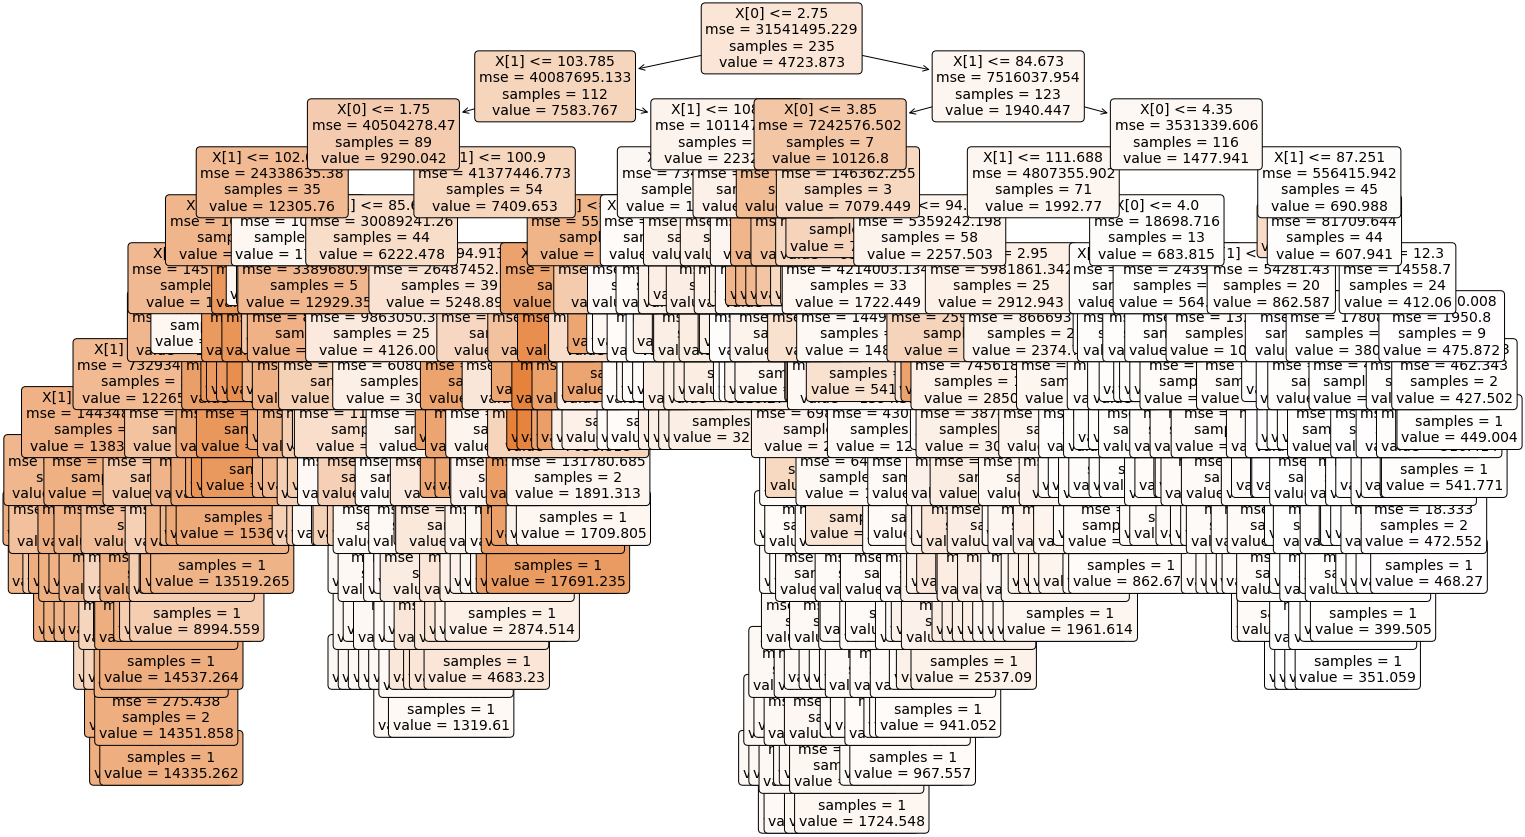

In [ ]:
import pydot
# Pull out one tree from the forest
Tree = regressor.estimators_[5]
# Export the image to a dot file
from sklearn import tree
plt.figure(figsize=(25,15))
tree.plot_tree(Tree,filled=True, 
              rounded=True, 
              fontsize=14);

# **Australian Model**

In [ ]:
from sklearn.model_selection import train_test_split
temp = data[['Inflation_Value', 'dollar_index']]
y_temp = data[['australian_dollar']]
x = temp.iloc[:,:].values
y= data.loc[:,['australian_dollar']].values

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
y_pred = regressor.predict(x_test)
y_pred

array([1574.96288435, 1118.03965766,  597.39992473,  585.64726933,
        500.80932618, 1509.2585847 ,  330.90771349, 1346.83808787,
        542.49147733, 1294.7843973 , 1415.63873039, 1334.01585198,
        469.85845887,  643.5358406 ,  517.54093497, 1379.75131847,
        484.61677316,  583.52488952,  585.32196662,  646.73603863,
        672.49464962,  603.82572759,  538.74186557, 1572.27018052,
       1387.23327819,  522.20735324,  531.15397575, 1616.78485065,
        440.49912157,  903.07910853, 1514.53187995,  327.45742557,
       1531.32609173,  493.91446104,  537.68390218,  981.26676491,
        961.64371321,  542.39358943,  585.32196662,  575.88005102,
        474.71229467,  494.78864886, 1497.4593816 , 1479.33559283,
        664.09501975, 1420.4829337 , 1547.64255805,  595.85958858,
       1336.05552577,  503.59914512,  499.83225744, 1573.45163348,
       1241.38082929,  542.7207889 ,  574.68997523, 1544.97751748,
       1577.6998631 ,  297.86803116, 1719.50024991,  550.61993

In [ ]:
accuracy_train = regressor.score(x_train, y_train)
accuracy_test = regressor.score(x_test, y_test)
print("Training Accuracy: ", accuracy_train * 100)
print("Testing Accuracy: ", accuracy_test * 100)

Training Accuracy:  93.16444810195263
Testing Accuracy:  44.49836053612478


In [ ]:
from sklearn import metrics
print('MAE :'," ", metrics.mean_absolute_error(y_test,y_pred))
print('MSE :'," ", metrics.mean_squared_error(y_test,y_pred))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE :   209.59969234227634
MSE :   147697.9109130062
RMAE :   384.3148590843271


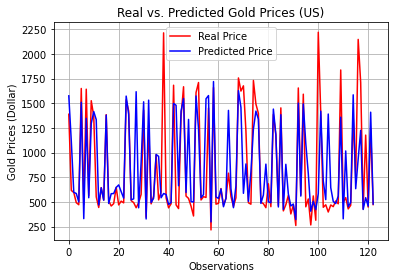

In [ ]:
plt.plot(y_test, color = 'Red', label = 'Real Price')
plt.plot(y_pred, color = 'Blue', label = 'Predicted Price')
plt.grid(2.5)
plt.title('Real vs. Predicted Gold Prices (US)')
plt.xlabel('Observations')
plt.ylabel('Gold Prices (Dollar)')
plt.legend()
plt.show()

In [ ]:
regressor.feature_importances_

array([0.43585148, 0.56414852])

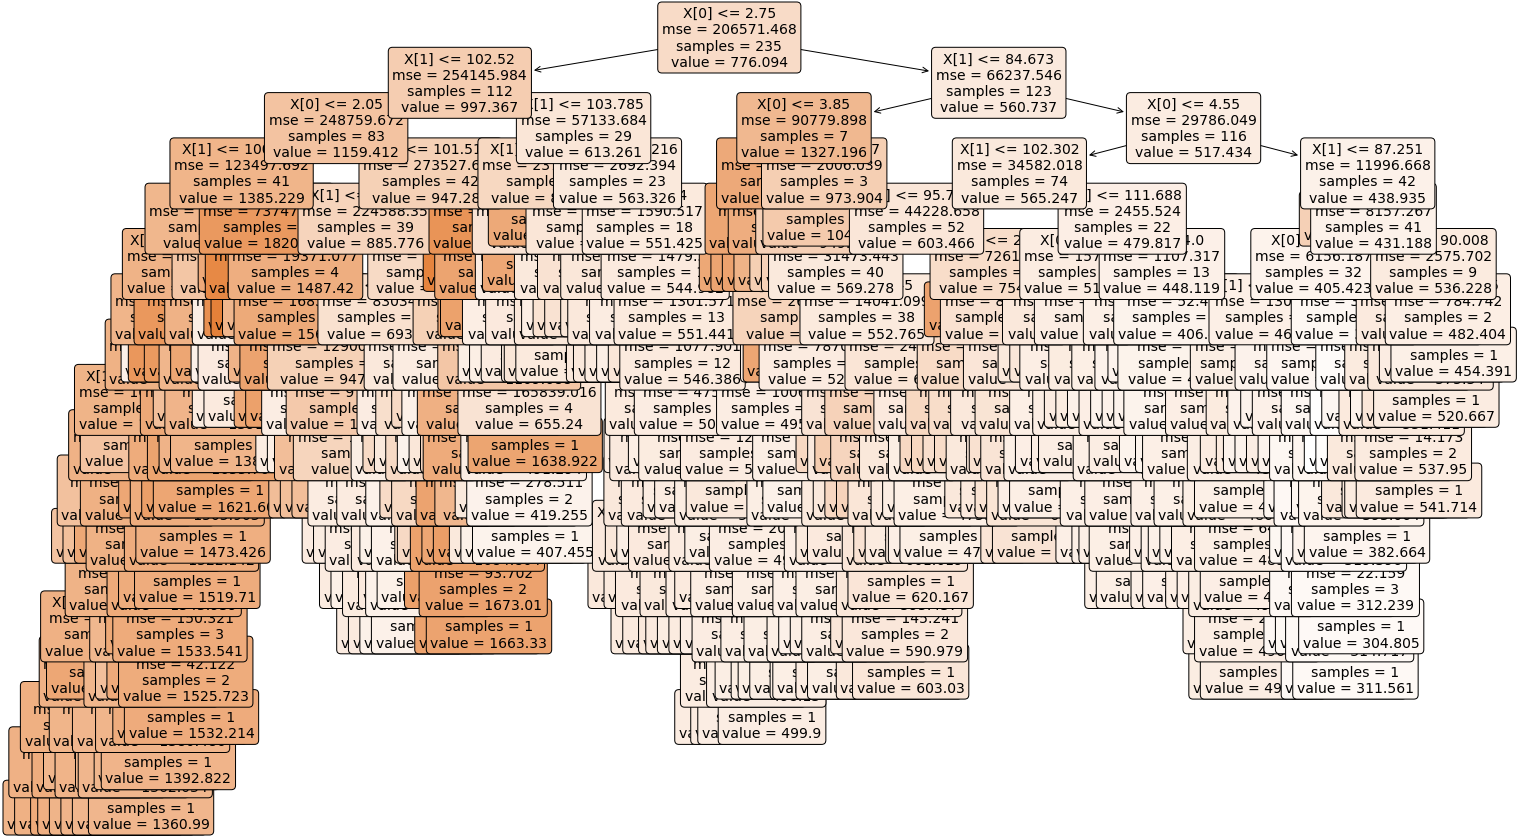

In [ ]:
import pydot
# Pull out one tree from the forest
Tree = regressor.estimators_[5]
# Export the image to a dot file
from sklearn import tree
plt.figure(figsize=(25,15))
tree.plot_tree(Tree,filled=True, 
              rounded=True, 
              fontsize=14);